TITLE Data Analytics I

Create a Linear Regression Model using Python/R to predict home prices using
Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston
Housing dataset contains information about various houses in Boston through
different parameters. There are 506 samples and 14 feature variables in this
dataset.
The objective is to predict the value of prices of the house using the given
features.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("boston_housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


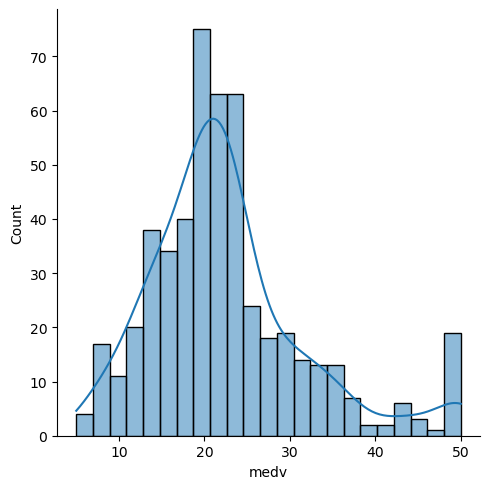

In [7]:
sns.displot(df["medv"],kde = True)

In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: >

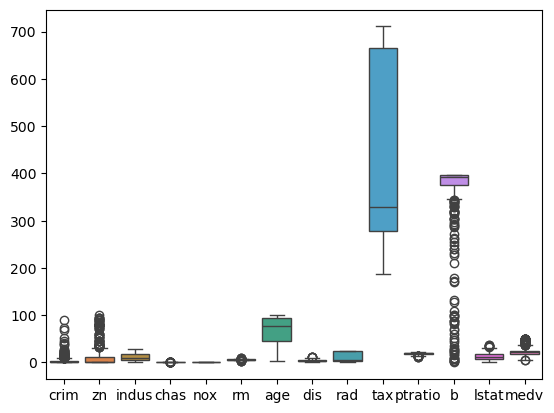

In [11]:
sns.boxplot(data=df)

In [12]:
from sklearn.model_selection import train_test_split

X = np.asarray(df.drop("medv" , axis = 1))
Y = np.asarray(df["medv"])


X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.3)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model.fit(X_train , Y_train)


LinearRegression()

In [15]:
Y_pred = model.predict(X_test)

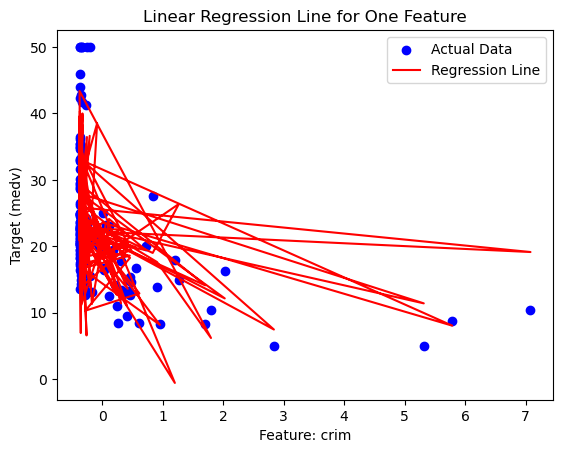

In [18]:
# Select one feature (e.g., the first feature in X_test)
feature_index = 0  # Change this index to select a different feature
feature_name = df.columns[feature_index]  # Get the feature name from the DataFrame

# Plot the actual vs predicted values for the selected feature
plt.scatter(X_test[:, feature_index], Y_test, color='blue', label='Actual Data')  # Scatter plot of actual data
plt.plot(X_test[:, feature_index], model.predict(X_test), color='red', label='Regression Line')  # Regression line

plt.xlabel(f'Feature: {feature_name}')
plt.ylabel('Target (medv)')
plt.title('Linear Regression Line for One Feature')
plt.legend()
plt.show()

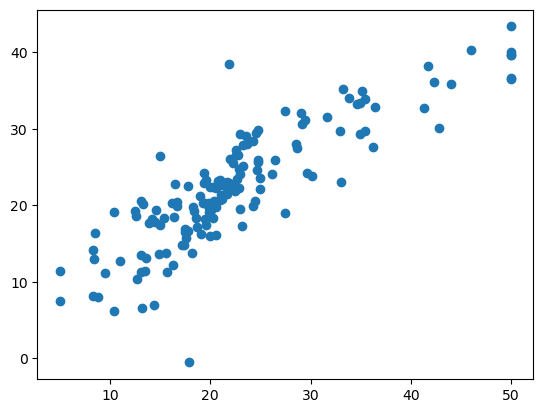

In [19]:
plt.scatter(Y_test , Y_pred)

In [20]:
from sklearn.metrics import mean_squared_error , r2_score

print("Root Mean Square Error:" , np.sqrt(mean_squared_error(Y_test , Y_pred)))
print("R2 Score" , r2_score(Y_test , Y_pred))

Root Mean Square Error: 4.891785611632231
R2 Score 0.736343123470248
